# Debt-Defying Budget Buddy
## Personal Finance Managment Tool

In [1]:
import pandas as pd
from pathlib import Path
import csv
import numpy as np
import panel as pn
import datetime
from matplotlib import pyplot as plt
from datetime import datetime, timezone
import hvplot.pandas

%matplotlib inline

In [2]:
 # Import csv file
filepath = Path("../Personal-Finance-Management-Tool_Project1/Data/personal-transaction.csv")

In [3]:
# Read the csv as a dataframe 
df= pd.read_csv(filepath, index_col='Date', infer_datetime_format=True, parse_dates=True)
df.head()

/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_22661/3313459864.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df= pd.read_csv(filepath, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Month,Description,Amount,Category,Account Name
Date,,,,,
2018-01-01,JANUARY,Amazon,11.11,Shopping,Platinum Card
2018-01-02,JANUARY,Mortgage Payment,1247.44,Mortgage & Rent,Checking
2018-01-02,JANUARY,Restaurant,24.22,Food,Silver Card
2018-01-05,JANUARY,Restaurant,25.85,Food,Silver Card
2018-01-08,JANUARY,Gas Company,45.00,Utilities,Checking


# Clean Up data 


In [4]:
# Retrieve data types to confirm what needs to be converted
df.dtypes

Month            object
Description      object
Amount          float64
Category         object
Account Name     object
dtype: object

In [5]:
df.count()

Month           270
Description     270
Amount          270
Category        270
Account Name    270
dtype: int64

In [6]:
# Drop the extra date column
df.drop(columns=['Account Name'], inplace=True)
df.head()

,Month,Description,Amount,Category
Date,,,,
2018-01-01,JANUARY,Amazon,11.11,Shopping
2018-01-02,JANUARY,Mortgage Payment,1247.44,Mortgage & Rent
2018-01-02,JANUARY,Restaurant,24.22,Food
2018-01-05,JANUARY,Restaurant,25.85,Food
2018-01-08,JANUARY,Gas Company,45.00,Utilities


In [7]:
# Count the frequency of each sector from the list of description
df_count= df['Description'].value_counts()
df_count

Description
Restaurant            81
Grocery Store         71
Amazon                37
Shell                 33
Mortgage Payment      12
Gas Company           12
City Water Charges    12
Power Company         12
Name: count, dtype: int64

# Group Categories



In [8]:
# Change the category column to unassigned
df['Category'] = 'unassigned'
df.head()

,Month,Description,Amount,Category
Date,,,,
2018-01-01,JANUARY,Amazon,11.11,unassigned
2018-01-02,JANUARY,Mortgage Payment,1247.44,unassigned
2018-01-02,JANUARY,Restaurant,24.22,unassigned
2018-01-05,JANUARY,Restaurant,25.85,unassigned
2018-01-08,JANUARY,Gas Company,45.00,unassigned


In [9]:
# Assign transactions to the correct category
# Shopping
df['Category'] = np.where(df['Description'].str.contains(
    'Amazon|Grocery Store'),
    'Shopping', df['Category'])

# Mortgage Rent
df['Category'] = np.where(df['Description'].str.contains(
    'Mortgage Payment'),
    'Mortgage Rent', df['Category'])

# Food
df['Category'] = np.where(df['Description'].str.contains(
    'Restaurant'),
    'Food', df['Category'])

# Utilities
df['Category'] = np.where(df['Description'].str.contains(
    'Gas Company|City Water Charges|Power Company'),
    'Utilities', df['Category'])

# Gas & Fuel
df['Category'] = np.where(df['Description'].str.contains(
    'Shell'),
    'Gas & Fuel', df['Category'])
df.head(15)


,Month,Description,Amount,Category
Date,,,,
2018-01-01,JANUARY,Amazon,11.11,Shopping
2018-01-02,JANUARY,Mortgage Payment,1247.44,Mortgage Rent
2018-01-02,JANUARY,Restaurant,24.22,Food
2018-01-05,JANUARY,Restaurant,25.85,Food
2018-01-08,JANUARY,Gas Company,45.00,Utilities
2018-01-11,JANUARY,Shell,34.87,Gas & Fuel
2018-01-11,JANUARY,Grocery Store,43.54,Shopping
2018-01-13,JANUARY,Restaurant,32.91,Food
2018-01-13,JANUARY,Amazon,39.05,Shopping


In [10]:
# Check unassigned transactions and confirm all transactions are assigned to a category
unassigned = df.loc(['Category']=='unassigned')
unassigned

In [11]:
# Group dataframe by consisting of month, amount and category
df2 = df[['Month','Amount','Category']]
df2

,Month,Amount,Category
Date,,,
2018-01-01,JANUARY,11.11,Shopping
2018-01-02,JANUARY,1247.44,Mortgage Rent
2018-01-02,JANUARY,24.22,Food
2018-01-05,JANUARY,25.85,Food
2018-01-08,JANUARY,45.00,Utilities
...,...,...,...
2018-12-26,DECEMBER,7.48,Gas & Fuel
2018-12-26,DECEMBER,44.99,Shopping
2018-12-28,DECEMBER,12.00,Food


In [12]:
# Group dataframe by category and sum amount
df3 = df2.groupby('Category').Amount.sum()
df3

Category
Food              2107.98
Gas & Fuel        1095.91
Mortgage Rent    14854.50
Shopping          3241.66
Utilities         1582.00
Name: Amount, dtype: float64

In [13]:
# Group dataframe by month and sum amount
df4 = df2.groupby('Month').Amount.sum()
df4

Month
APRIL        1985.13
AUGUST       1730.84
DECEMBER     2254.32
FEBURARY     1858.48
JANUARY      1833.54
JULY         1944.19
JUNE         1819.15
MARCH        1972.20
MAY          2108.93
NOVEMBER     1683.27
OCTOBER      1810.73
SEPTEMBER    1881.27
Name: Amount, dtype: float64

In [14]:
# Plot bar chart of last year's expenses
# Specify the variables for the x- and y-axes using the syntax
df2_plot = df3.hvplot(kind='bar', 
           x='Category', 
           y='Amount') \
   .opts(title='Last the year expenses', 
           xlabel='Category', 
           ylabel='Amount', 
           yformatter='%.0f')
df2_plot

:Bars   [Category]   (Amount)

# Summary of A Certain Month's Income


In [15]:
# Get the latest month and year 
input_month = input("Which month would you like to look further into? (must be all uppercase): ")
input_month


'MARCH'

In [16]:
# Filter the dataframe to include only transactions from the latest month
input_month_expenses = df[(df['Month']== input_month)] 

In [17]:
# Summary table of month user inputted
input_month_expenses = input_month_expenses.groupby('Category')['Amount'].sum().reset_index()
# Sort value
input_month_expenses = input_month_expenses.sort_values(by='Amount', ascending=False)
# Round value 
input_month_expenses['Amount'] = input_month_expenses['Amount'].round().astype(int)

input_month_expenses

,Category,Amount
2,Mortgage Rent,1247
0,Food,267
3,Shopping,245
4,Utilities,147
1,Gas & Fuel,65


In [18]:
# Total amount of all categories within a month
input_month_expenses_tot = input_month_expenses['Amount'].sum()
input_month_expenses_tot
print(f"This is the total amount of how much you spent that month: {input_month_expenses_tot}")

This is the total amount of how much you spent that month: 1971


# Confirming if Person Spent Right the Whole Year

In [19]:
# To know if spent right
# Set annual income
annual_income = 18000

# Calculate total amount of expenses
total_expenses = df['Amount'].sum()
total_expenses


22882.050000000003

In [20]:
# Validate expenses health
if total_expenses > annual_income:
    print('I made a loss')
elif total_expenses == annual_income:
    print('I could not save any money')
else:
    print('I saved less amount ')

I made a loss


In [21]:
annual_income_value = 18000
total_expenses_value = 22882.05

In [22]:
# Create expenses DataFrame
df_expenses = pd.DataFrame(
    {'Amount': [annual_income_value, total_expenses_value]},
    ['annual_income','total_expenses'],
)

array([<Axes: ylabel='Amount'>], dtype=object)

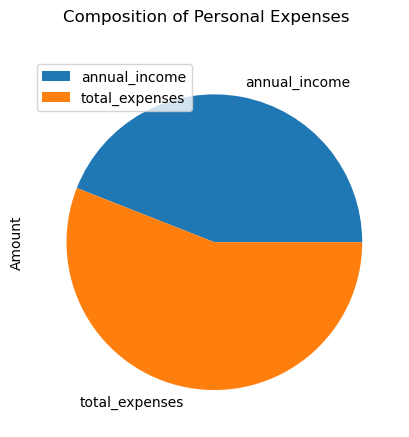

In [23]:
# Plot expense pie chart
df_expenses.plot.pie(
    subplots=True,
    title='Composition of Personal Expenses',
    y='Amount',
    )

# What New Monthly Goal?

# Whole Summary

In [24]:
# Widget panel option for categories 
select_category1 = pn.widgets.Select(name = 'Select Category', options =[
    'All',
    'Shopping',
    'Mortgage Rent',
    'Food',
    'Utilities',
    'Gas & Fuel',
])

select_category1
                                    

BokehModel(combine_events=True, render_bundle={'docs_json': {'07b4c708-6c7a-4261-a36e-c5ccbe67920f': {'version…

In [43]:
# Widget panel option for months
select_category2 = pn.widgets.Select(name = 'Select Month', options =[
    'All',
    'JANUARY',
    'FEBRUARY',
    'MARCH',
    'APRIL',
    'MAY',
    'JUNE',
    'JULY',
    'AUGUST',
    'SEPTEMBER',
    'OCTOBER',
    'NOVEMBER',
    'DECEMBER'

])

select_category2

BokehModel(combine_events=True, render_bundle={'docs_json': {'aaef176a-a8bf-461c-8bfb-48a8b8e63189': {'version…

In [49]:
# Create the summary table for a selected category
def filter_df(category, month=None):
    if category == 'All':
        return df
    return df[df['Category']== category]
    if month == 'All':
        return df
    return df[df['Month']== month]

# Create a DataFrame Widget that updates based on category and month filter
summary_table = pn.widgets.DataFrame(filter_df('All'), height=500, width=500)

# Define a callback that updates the dataframe widget when the category filter is changed
def update_summary(event):
    summary_table.value = filter_df(event.new)


# Add callback function to the category and month widget
select_category1.param.watch(update_summary,'value')
select_category2.param.watch(update_summary,'value')

summary_table

BokehModel(combine_events=True, render_bundle={'docs_json': {'745debb7-4cb0-4301-8752-951503e8f979': {'version…